In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def monthly_payment(n_periods, period_interest_rate, present_value, future_value=0):
    """
    Calculate monthly payment using Present/Future Value formula.
    time_years : float
        Loan or investment duration in years.
    annual_interest_rate : float
        Annual interest rate in percentage (e.g., 6 for 6%).
    present_value : float
        Present value (loan amount or investment).
    future_value : float, optional
        Future value at the end of the period (default 0).
    Returns
    -------
    float
        Monthly payment.
    """
    # Convert annual rate to monthly decimal rate
    r = period_interest_rate
    n = n_periods

    if r == 0:
        # No interest case
        return (present_value + future_value) / n

    # Payment formula
    pmt = (r * (present_value + future_value / ((1 + r) ** n))) / (1 - (1 + r) ** -n)

    lifetime_pmt = n_periods*pmt
    lifetime_yield = (lifetime_pmt-present_value)/present_value
    
    # print(f'Lifetime Payment: {lifetime_pmt}'
    print(f'Period Payment: {round(pmt, 2)}')
    print(f'Total Periods: {n_periods}')
    print(f'Yearly Payment: {round(pmt*12, 2)}')
    print(f'Lifetime Payment if Paid every Month: {round(lifetime_pmt, 2)}')    
    print(f'Lifetime Yield: {round(lifetime_yield*100, 2)}%')

    return pmt#, lifetime_pt, lifetime_yield





In [4]:
# If I have 500K and wish to buy a 400K home, how many months does it take to reach the 400K if I took out a 30 year loan and borrowed at 5%?

In [40]:
def generate_amortatized_loan(total_principal, n_periods, period_interest_rate,period_payment):
    df = pd.DataFrame(columns=['Period', 'Beginning_Principle', 'Payment', 'Interest_Rate'
                                                  , 'Paid_Interest', 'Paid_Principal'
                                                  , 'Ending_Principle','Total_Principal', 'Total_Interest'])
    period_counter = 0
    ending_balance = total_principal
    total_principal = 0
    total_interest = 0
    total_payment = 0 
    
    for p in range(n_periods):
        period_counter += 1
        beginning_balance = ending_balance
        payment = period_payment
        interest = period_interest_rate
        paid_interest = beginning_balance*interest
        paid_principal = payment-paid_interest
        ending_balance = beginning_balance-paid_principal
        
        total_principal += paid_principal
        total_interest += paid_interest
        total_payment += payment
        
        dic = {}
        dic['Beginning_Principle'] = [beginning_balance]
        dic['Period'] = [period_counter]
        dic['Payment'] = [payment]
        dic['Interest_Rate'] = [interest]
        dic['Paid_Interest'] = [paid_interest]
        dic['Paid_Principal'] = [paid_principal]
        dic['Ending_Principle'] = [ending_balance]
        dic['Total_Principal'] = [total_principal]
        dic['Total_Interest'] = [total_interest]
        dic['Total_Payment'] = [total_payment]
        df = pd.concat([df, pd.DataFrame(dic)])    
        # break
    return df

#### Generate Amortatized Loan

Period Payment: 442.28
Total Periods: 1000
Yearly Payment: 5307.38
Lifetime Payment if Paid every Month: 442281.44
Lifetime Yield: 47.43%


/tmp/ipykernel_2558435/475645900.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(dic)])


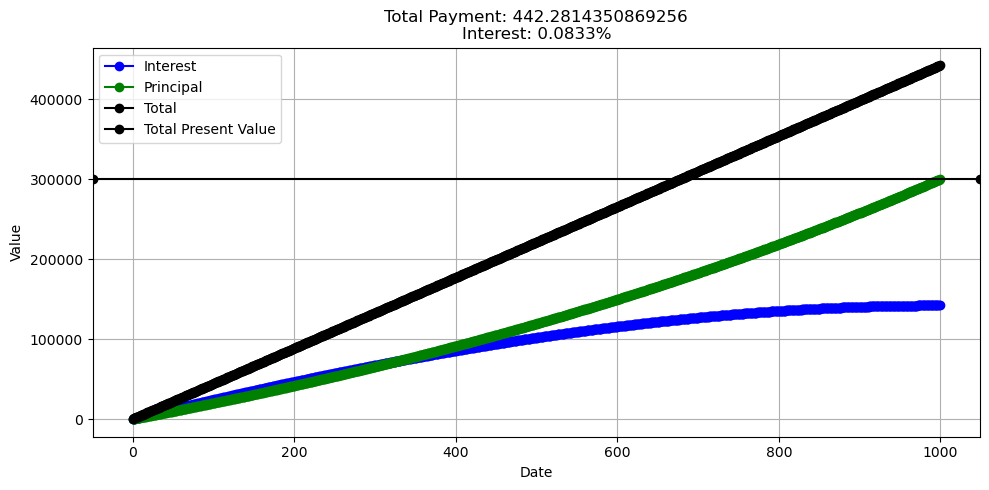

In [61]:
principal = 300000
n_periods = 1000
period_interest_rate = 0.01/12
period_payment = monthly_payment(n_periods=n_periods, period_interest_rate=period_interest_rate, present_value=principal, future_value=0)
df = generate_amortatized_loan(principal, n_periods, period_interest_rate, period_payment)


# Create a sample pandas Series
data0 = df['Total_Interest'].reset_index(drop=True)
data1 = df['Total_Principal'].reset_index(drop=True)
data2 = df['Total_Payment'].reset_index(drop=True)
                 # index=pd.date_range("2025-01-01", periods=7))

# Plot the Series
plt.figure(figsize=(10, 5))
plt.plot(data0, marker='o', linestyle='-', color='blue', label='Interest')
plt.plot(data1, marker='o', linestyle='-', color='green', label='Principal')
plt.plot(data2, marker='o', linestyle='-', color='black', label='Total')
plt.axhline(principal, marker='o', linestyle='-', color='black', label='Total Present Value')

# Add titles and labels
plt.title(f"Total Payment: {df['Payment'].iloc[0]}\nInterest: {round(100*period_interest_rate, 4)}%")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [43]:
# df['Paid_Interest'].reset_index(drop=True)

0     1250.000000
1     1239.898192
2     1229.754293
3     1219.568127
4     1209.339520
         ...     
95      75.603050
96      60.607921
97      45.550313
98      30.429964
99      15.246614
Name: Paid_Interest, Length: 100, dtype: float64

In [54]:
# df

,Period,Beginning_Principle,Payment,Interest_Rate,Paid_Interest,Paid_Principal,Ending_Principle,Total_Principal,Total_Interest,Total_Payment
0,1,300000,3127.985014,0.000833,250.000000,2877.985014,2.971220e+05,2877.985014,250.000000,3127.985014
0,2,297122.014986,3127.985014,0.000833,247.601679,2880.383335,2.942416e+05,5758.368349,497.601679,6255.970028
0,3,294241.631651,3127.985014,0.000833,245.201360,2882.783654,2.913588e+05,8641.152003,742.803039,9383.955042
0,4,291358.847997,3127.985014,0.000833,242.799040,2885.185974,2.884737e+05,11526.337977,985.602079,12511.940056
0,5,288473.662023,3127.985014,0.000833,240.394718,2887.590296,2.855861e+05,14413.928272,1225.996797,15639.925070
...,...,...,...,...,...,...,...,...,...,...
0,96,15600.901158,3127.985014,0.000833,13.000751,3114.984263,1.248592e+04,287514.083105,12772.478233,300286.561338
0,97,12485.916895,3127.985014,0.000833,10.404931,3117.580083,9.368337e+03,290631.663188,12782.883164,303414.546352
0,98,9368.336812,3127.985014,0.000833,7.806947,3120.178067,6.248159e+03,293751.841255,12790.690111,306542.531366
0,99,6248.158745,3127.985014,0.000833,5.206799,3122.778215,3.125381e+03,296874.619470,12795.896910,309670.516380
